In [1]:
"""
It's clear that we need to detect face before classifying.
But it isn't trivial task.
You will use ALREADY trained model for this purpose.

We will use https://github.com/ipazc/mtcnn"""


"\nIt's clear that we need to detect face before classifying.\nBut it isn't trivial task.\nYou will use ALREADY trained model for this purpose.\n\nWe will use https://github.com/ipazc/mtcnn"

In [2]:
#Detect & crop faces

from scipy import misc
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
#import logging
#logging.getLogger('tensorflow').disabled = True

import tensorflow as tf
import numpy as np
import sys
import os
import copy
import argparse
import sys


import detect_face

minsize = 20  # minimum size of face
threshold = [0.6, 0.7, 0.7]  # three steps's threshold
factor = 0.709  # scale factor
gpu_memory_fraction = 0.5

print('Creating networks and loading parameters')
with tf.Graph().as_default():
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=False))
    with sess.as_default():
        pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

    def load_and_align_data(image_paths, image_size, margin, gpu_memory_fraction):
        img_list = []
        for image in image_paths:
            img = misc.imread(os.path.expanduser(image), mode='RGB')
            img_size = np.asarray(img.shape)[0:2]
            bounding_boxes, _ = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)
            if len(bounding_boxes) < 1:
                print("can't detect face ", image)
                img_list.append(None)
                continue
            det = np.squeeze(bounding_boxes[0, 0:4])
            bb = np.zeros(4, dtype=np.int32)
            bb[0] = np.maximum(det[0] - margin / 2, 0)
            bb[1] = np.maximum(det[1] - margin / 2, 0)
            bb[2] = np.minimum(det[2] + margin / 2, img_size[1])
            bb[3] = np.minimum(det[3] + margin / 2, img_size[0])
            cropped = img[bb[1]:bb[3], bb[0]:bb[2], :]
            aligned = misc.imresize(cropped, (image_size, image_size), interp='bilinear')
            prewhitened = aligned #facenet.prewhiten(aligned)
            img_list.append(prewhitened)
        return img_list
    
    import os
    import numpy as np

    root = './faces/'
    class_names = os.listdir(root)

    test_ratio = 0.2 # ratio of data used only for testing

    trainX = []
    trainY = []

    testX = []
    testY = []

    image_size = 160
    margin = 44

    for class_id, class_name  in enumerate(class_names):
        print(class_name)
        class_dir = os.path.join(root, class_name)
        img_paths = [os.path.join(class_dir, p) for p in os.listdir(class_dir)]
        imgs = load_and_align_data(list(img_paths), image_size, margin, gpu_memory_fraction)

        n = len(imgs)
        for img, path, i in zip(imgs, img_paths, range(n)):
            if img is None:
                continue
            if i < n*test_ratio:
                testX.append(img)

                testY.append(class_id)
            else:
                trainX.append(img)
                trainY.append(class_id)

    trainX = np.array(trainX)
    trainY = np.array(trainY)

    testX = np.array(testX)
    testY = np.array(testY)

    print(trainX.shape)
    print(trainY.shape)
    print(testX.shape)
    print(testY.shape)


Creating networks and loading parameters
Алёна


C:\Users\alkor\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\alkor\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Александр И
Александр К
Александр Кор
Андрей
аня
Женя
can't detect face  ./faces/Женя\kTexq5QxKZA.jpg
инна
Камила
Ксения М
can't detect face  ./faces/Ксения М\UVO2jWVhMc8.jpg
Ксения Т
лена
Лена Ф
Надя
Надя Я
Настя
Оля Д
Оля Л
can't detect face  ./faces/Оля Л\1ap3024j8As.jpg
can't detect face  ./faces/Оля Л\3cghqunjkhw.jpg
can't detect face  ./faces/Оля Л\6rZfogIK5CM.jpg
can't detect face  ./faces/Оля Л\BlDlDAErv94.jpg
can't detect face  ./faces/Оля Л\cG2Hq2SHmzo.jpg
can't detect face  ./faces/Оля Л\Dez_Cw1-xEw.jpg
can't detect face  ./faces/Оля Л\jOLV5DFqL9Q.jpg
can't detect face  ./faces/Оля Л\O6a9zaFSCow.jpg
Сергей Б
Сергей М
Соня
Таня
юля Г
Юля К
Юля Ш
(527, 160, 160, 3)
(527,)
(142, 160, 160, 3)
(142,)


In [3]:
# [0, 255] -> [0.0, 1.0]
trainX = trainX / 255.0
testX = testX / 255.0

In [4]:
def one_hot(Y):
    class_num = len(class_names)
    ret = np.zeros((Y.shape[0], class_num), dtype=np.float)
    for i in range(Y.shape[0]):
        class_id = Y[i]
        ret[i, class_id] = 1
        print(class_id, '->', ret[i,:])
    return ret

trainY = one_hot(trainY)
testY = one_hot(testY)

print(trainY.shape)
print(testY.shape)


0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0 ->

 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0

13 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
13 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
13 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
14 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
15 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

In [5]:
np.save('trainX.npy', trainX)
np.save('trainY.npy', trainY)
np.save('testX.npy', testX)
np.save('testY.npy', testY)


In [ ]:
""" Retart kernel here. Bug in memory allocation, you need to free your gpu memory """

In [6]:
import numpy as np
trainX = np.load('trainX.npy')
trainY = np.load('trainY.npy')
testX = np.load('testX.npy')
testY = np.load('testY.npy')


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(sample):
    pixels = np.array(sample, dtype = 'float32')
    #
    plt.imshow(pixels)
    plt.show()
    

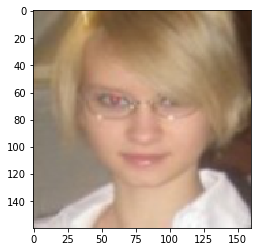

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


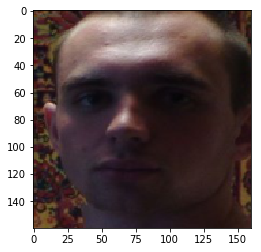

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


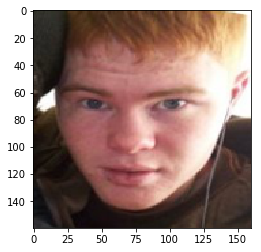

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


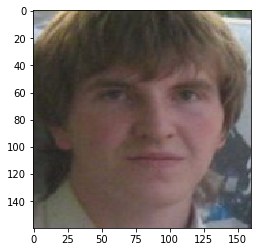

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


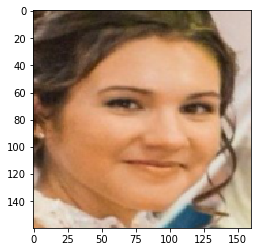

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


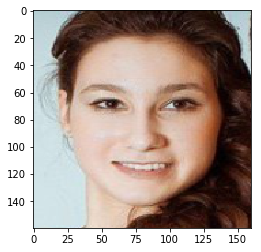

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


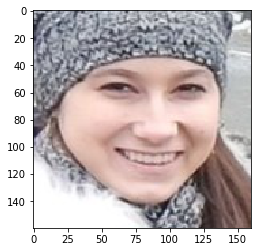

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


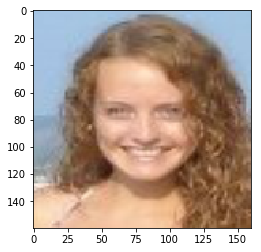

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


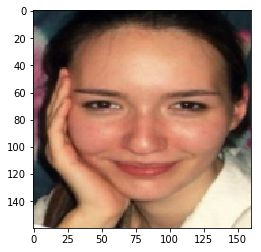

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


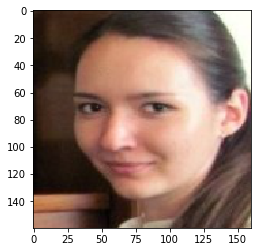

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


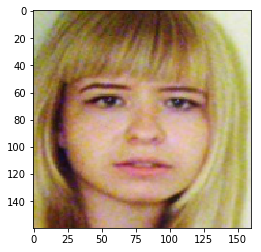

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


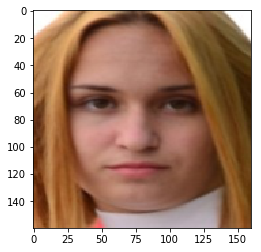

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


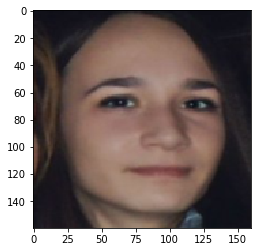

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


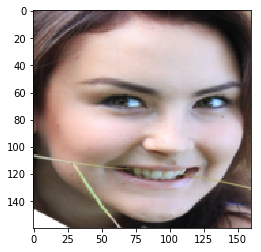

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


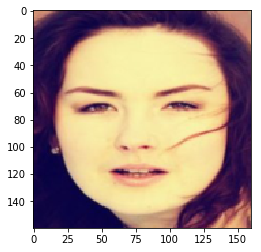

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


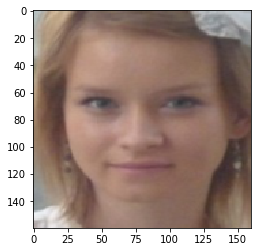

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


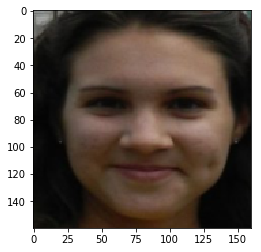

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


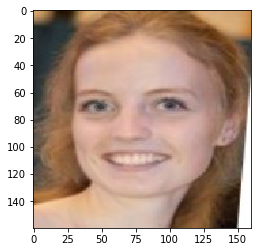

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


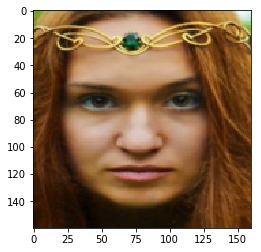

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


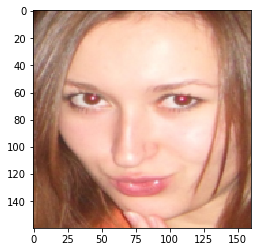

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
for i in range(15):
    show_img(trainX[i*20, :])
    print (trainY[i*20])
    
for i in range(5):
    show_img(testX[i*20, :])
    print (testY[i*20])

In [9]:
example_num, input_n, input_m, input_c = trainX.shape
output_num = len(trainY[0,:])
print(example_num, input_n, input_m, input_c, output_num)

527 160 160 3 25


In [10]:
trainY.shape

(527, 25)

In [11]:
import tensorflow as tf

print(tf.__version__)

#config = tf.ConfigProto(intra_op_parallelism_threads=3, inter_op_parallelism_threads=3, \
#                        allow_soft_placement=True, device_count = {'CPU': 1})
#session = tf.Session(config=config)
session = tf.InteractiveSession()


1.6.0


In [12]:

# here we operate with 4D objects (called here tensor) and most functions are vector-functions
# first dimenstion correspond to batch

# placeholder is a special tf-type. It means that you will 'place' a data to it in runtime.
# we have to specify a shape and a type only.
# we can leave first shape as None. It means batch size will be specified at runtime
x = tf.placeholder(tf.float32, shape=(None, input_n, input_m, input_c), name='x') # don't rename it
y = tf.placeholder(tf.float32, shape=(None, output_num), name='y') # don't rename it

#MODEL DEFINITIAN.
#You are able to chage filter sizes, filter numbers, initialization (truncated normal, zeros, here), activation func, etc
#You can add new layers, but you should explain me why you added it.

#init stats
mu = 0.0
sigma = 0.1

# convolution. see https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

# Layer 1: Convolutional. Input = 160x160x3. Output = 160x160x3.
conv1_w = tf.Variable(tf.truncated_normal(shape = [7,7,3,20],mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(20))
conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'SAME') + conv1_b 
# TODO: Activation.
conv1 = tf.nn.relu(conv1)

# Pooling. Input = 20x20x6. Output = 10x10x6.
pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

# Layer 2: Convolutional.Sizes ________(write here)
conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,20,10],mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(10))
conv2 = tf.nn.conv2d(pool_1,conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b 
#  Activation.
conv2 = tf.nn.relu(conv2)

# TODO: Pooling. Sizes ________(write here)
pool_2 = tf.nn.max_pool(conv2,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')


#make it flatten 
flat = tf.contrib.layers.flatten(pool_2)

# Layer 4: Fully-connected. Sizes _________ (write here)
# layers from tf.contrib is high-level. You don't need to define weights, biases, etc manually  :)
fc1 = tf.contrib.layers.fully_connected(flat, 100)

#https://www.tensorflow.org/api_docs/python/tf/nn/dropout
# dropuout is a kind of regularization. # regularization prevents from overfitting
# use placeholder for change behavier in train-time and inference-time
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')
fc1 = tf.contrib.layers.dropout(fc1, keep_prob=keep_prob)

#none means no activation function. it's needed for stability in cross-entropy.
y_pred = tf.contrib.layers.fully_connected(flat, output_num, activation_fn=None)

# cross-Entropy loss
#cost = -tf.reduce_mean(tf.reduce_sum((y*tf.log(y_pred)+(1-y)*tf.log(1-y_pred)), reduction_indices=1))
# see https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

# Regularization. You can penalti model by adding additional member to your loss function(cost)
# popular regularization is L2 called weight decay, L1, and L1 + L2 called Lasso
# regularization prevents from overfitting
# tf.trainable_variables() - list of all variables
#cost = cost + some_norm_from(weights) 

lr = 0.005 # learning rate
optimizer = tf.train.GradientDescentOptimizer(lr)
update = optimizer.minimize(cost)

pred = tf.cast(tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1)), tf.float32)
acc = tf.reduce_mean(pred) # don't rename this op




In [13]:
#Train!
# don't use test data here

# we should split the data into mini-batches.
# little batch is better but slower
# big bacth is faster and little bit worse. And limited by your GPU memory
batch_size = 64
epocs=200 # 1 epoch is view of all elements in dataset 1 time
batch_num = int(example_num/batch_size) # here we loose a rest of batch you can add it

session.run(tf.global_variables_initializer()) # it's necessary


for epoch in range(epocs):
    err = 0
    acc_train_ = 0.0

    for batch in range(batch_num):
        # extract a batch
        batch_x = trainX[batch*batch_size : batch*batch_size + batch_size]
        batch_y = trainY[batch*batch_size : batch*batch_size + batch_size]
        
        # a key operation. Run 'operations' and place data in placeholders 'x' and 'y'
        _, err_, acc_train = session.run([update, cost, acc], feed_dict={x:batch_x, y:batch_y, keep_prob:0.95})
        err += err_
        acc_train_ += acc_train
    err /= batch_num
    acc_train_ /= batch_num

    print("epoch: %d error:%f, acc_train: %f" % (epoch, err, acc_train_))
    
    acc_test = session.run([acc], feed_dict={x:testX, y:testY})
    print('acc_test:%f'%acc_test[0])

print("optimization done")




epoch: 0 error:6.600062, acc_train: 0.017578
acc_test:0.056338
epoch: 1 error:3.258525, acc_train: 0.056641
acc_test:0.077465
epoch: 2 error:3.227208, acc_train: 0.039062
acc_test:0.091549
epoch: 3 error:3.206758, acc_train: 0.017578
acc_test:0.084507
epoch: 4 error:3.191520, acc_train: 0.068359
acc_test:0.091549
epoch: 5 error:3.192008, acc_train: 0.070312
acc_test:0.077465
epoch: 6 error:3.157981, acc_train: 0.113281
acc_test:0.063380
epoch: 7 error:3.197136, acc_train: 0.070312
acc_test:0.070423
epoch: 8 error:3.137327, acc_train: 0.107422
acc_test:0.063380
epoch: 9 error:3.127967, acc_train: 0.128906
acc_test:0.063380
epoch: 10 error:3.117581, acc_train: 0.130859
acc_test:0.063380
epoch: 11 error:3.114882, acc_train: 0.136719
acc_test:0.070423
epoch: 12 error:3.104157, acc_train: 0.132812
acc_test:0.070423
epoch: 13 error:3.092897, acc_train: 0.132812
acc_test:0.077465
epoch: 14 error:3.077650, acc_train: 0.130859
acc_test:0.077465
epoch: 15 error:3.063577, acc_train: 0.125000
acc_

epoch: 128 error:0.019210, acc_train: 1.000000
acc_test:0.260563
epoch: 129 error:0.018462, acc_train: 1.000000
acc_test:0.260563
epoch: 130 error:0.017766, acc_train: 1.000000
acc_test:0.260563
epoch: 131 error:0.017116, acc_train: 1.000000
acc_test:0.260563
epoch: 132 error:0.016509, acc_train: 1.000000
acc_test:0.260563
epoch: 133 error:0.015942, acc_train: 1.000000
acc_test:0.253521
epoch: 134 error:0.015411, acc_train: 1.000000
acc_test:0.253521
epoch: 135 error:0.014910, acc_train: 1.000000
acc_test:0.253521
epoch: 136 error:0.014439, acc_train: 1.000000
acc_test:0.253521
epoch: 137 error:0.013995, acc_train: 1.000000
acc_test:0.253521
epoch: 138 error:0.013575, acc_train: 1.000000
acc_test:0.253521
epoch: 139 error:0.013178, acc_train: 1.000000
acc_test:0.253521
epoch: 140 error:0.012803, acc_train: 1.000000
acc_test:0.253521
epoch: 141 error:0.012447, acc_train: 1.000000
acc_test:0.253521
epoch: 142 error:0.012106, acc_train: 1.000000
acc_test:0.253521
epoch: 143 error:0.011784

In [14]:
# Test!
# don't change these line

acc_test = session.run([acc], feed_dict={x:testX, y:testY})
print('acc:%f'%acc_test[0])

acc:0.253521
